<a href="https://colab.research.google.com/github/sakshibatra/paintify/blob/master/Paintify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
import urllib.request
#urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnvOIRkKiYdYoZjgvpcAXWailnRMARh7XRNMs8XU5_sNQMiOxI", "00000001.jpg")

#
urllib.request.urlretrieve("https://www.history.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_686/MTU3ODc4NjAzNzg1ODQwMzUx/image-placeholder-title.webp", "00000001.jpg")


('00000001.jpg', <http.client.HTTPMessage at 0x7fe8badd00b8>)

In [0]:
from matplotlib import image as img

In [0]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
 
# def auto_canny(image, sigma=0.33):
# 	# compute the median of the single channel pixel intensities
# 	v = np.median(image)
 
# 	# apply automatic Canny edge detection using the computed median
# 	lower = int(max(0, (1.0 - sigma) * v))
# 	upper = int(min(255, (1.0 + sigma) * v))
# 	edged = cv2.Canny(image, lower, upper)
 
# 	# return the edged image
# 	return edged


# img = cv2.imread('00000001.jpg',0)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# auto = auto_canny(blurred)
# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(auto,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# plt.show()


In [0]:
image = img.imread('00000001.jpg')

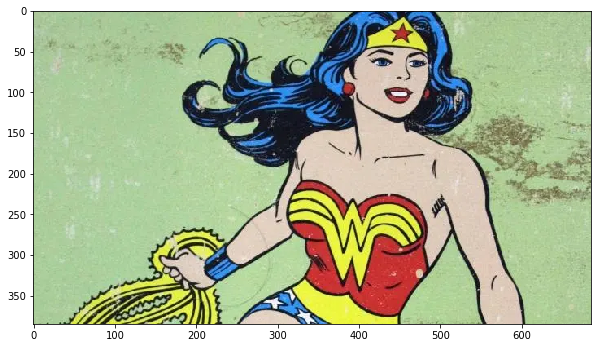

In [445]:
%matplotlib inline
from pylab import rcParams

from matplotlib import pyplot as plt
rcParams['figure.figsize'] = 10, 10

plt.imshow(image)


In [0]:
r = []
g = []
b = []
for line in image:
  for pixel in line:
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

In [0]:
import pandas as pd
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})


In [0]:
# from scipy.cluster.vq import whiten
# df['scaled_red'] = whiten(df['red'])
# df['scaled_blue'] = whiten(df['blue'])
# df['scaled_green'] = whiten(df['green'])
# df.sample(n = 10)


In [0]:
df= df.astype(float)
from scipy.cluster.vq import kmeans2
centroid,label= kmeans2(df[['red', 'green', 'blue']],10)


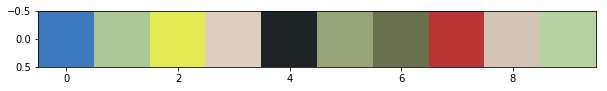

In [449]:
plt.imshow([centroid.astype(int)])
plt.show()


In [0]:
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compress_image(means, index, img): 
  
    # recovering the compressed image by 
    # assigning each pixel to its corresponding centroid. 
    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
      
    # getting back the 3d matrix (row, col, rgb(3)) 
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1], 
                                                     img.shape[2])) 
  
    #plotting the compressed image. 
    plt.imshow(image) 
    plt.show() 
    recovered =     (recovered).astype(np.uint8)
    #print(recovered)
    edges = cv2.Canny(image,100,400)
    #cv2.imshow('Edges',edges)

#     gray = cv2.cvtColor(recovered, cv2.COLOR_RGB2GRAY)
#     viewImage(gray) ## 3

#     ret,thresh = cv2.threshold(gray,127,255,0)
#     contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     cv2.drawContours(im,contours,-1,(0,255,0),3)
    plt.imshow(recovered) 
    plt.show() 
    plt.imshow(edges) 
    plt.show() 
    # saving the compressed image. 


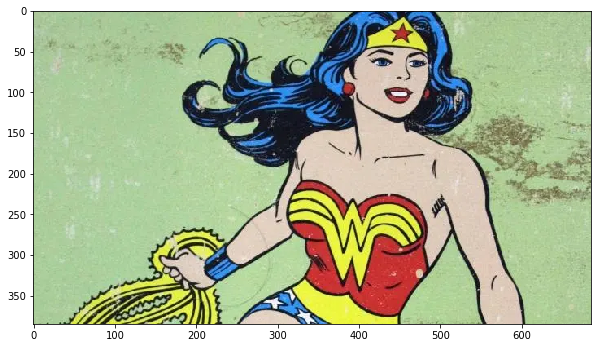

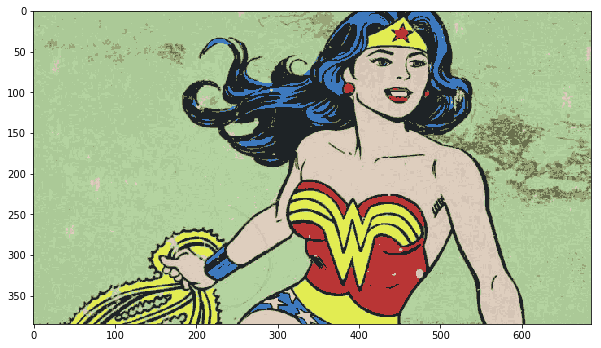

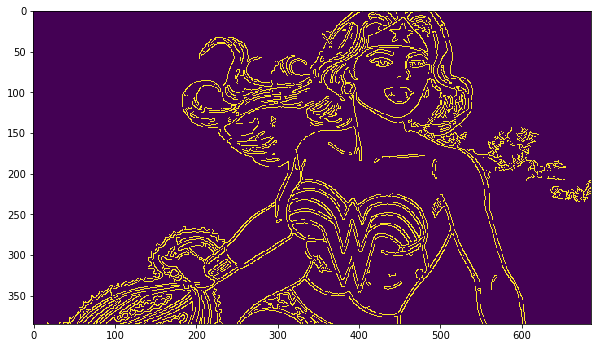

In [451]:
compress_image(centroid.astype(int),label,image)

In [0]:
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_region(means, index, img): 
  
    # recovering the compressed image by 
    # assigning each pixel to its corresponding centroid. 
    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
      
    # getting back the 3d matrix (row, col, rgb(3)) 
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1], 
                                                     img.shape[2])) 
  
    #plotting the compressed image. 
    plt.imshow(image) 
    plt.show() 
    recovered =     (recovered).astype(np.uint8)
    #print(recovered)
    edges = cv2.Canny(recovered,100,200,3, L2gradient=True)
    #cv2.imshow('Edges',edges)

#     gray = cv2.cvtColor(recovered, cv2.COLOR_RGB2GRAY)
#     viewImage(gray) ## 3

#     ret,thresh = cv2.threshold(gray,127,255,0)
#     contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     cv2.drawContours(im,contours,-1,(0,255,0),3)
    plt.subplot(121),plt.imshow(recovered)
    plt.title('Recovered Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


    # saving the compressed image. 


In [0]:
# colors = []
# r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
# for cluster_center in cluster_centers:
#   scaled_r, scaled_g, scaled_b = cluster_center
#   colors.append((
#   scaled_r * r_std / 255,
#   scaled_g * g_std / 255,
#   scaled_b * b_std / 255
#   ))
# plt.imshow([cluster_centers])
# plt.show()


In [369]:
df

,red,blue,green
0,4.0,79.0,39.0
1,3.0,78.0,38.0
2,2.0,77.0,37.0
3,0.0,75.0,35.0
4,0.0,75.0,35.0
5,0.0,75.0,35.0
6,1.0,76.0,36.0
7,1.0,76.0,36.0
8,4.0,79.0,39.0
9,4.0,79.0,39.0


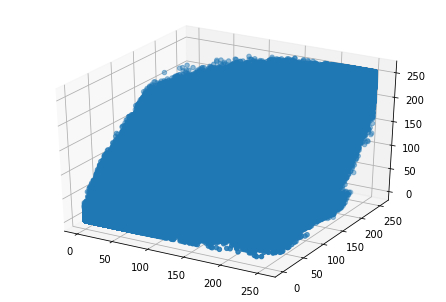

In [370]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()


In [0]:
from sklearn.cluster import DBSCAN